<a href="https://colab.research.google.com/github/nshutielise/-Python-Pizza-Deliveries/blob/main/Insurance_Data_Scientist_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Insurance - Data Scientist Challenge**


###**Data Exploration and Preprocessing**

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np


# Load the dataset from the CSV file
insurance_df = pd.read_csv('insurance.csv')

#The first five rows in our data
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
#Getting the shape of the data
insurance_df.shape


(1338, 7)

In [77]:
# Printing unique values in the 'region' column
print(insurance_df['region'].unique())


['southwest' 'southeast' 'northwest' 'northeast']


In [78]:
#Getting more information about the data
insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
#Checking for null
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
#Getting the statistical details of the numeric data in our dataset.
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#**Task a: Summary statistics of the 'charges' variable**

In [81]:
# Task a: Summary statistics of the 'charges' variable
charges_summary = insurance_df['charges'].describe()
print("Summary statistics of the 'charges' variable:")
charges_summary


Summary statistics of the 'charges' variable:


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

###**Task b: Display a table with the number of people in each region**

In [82]:
# Task b: Display a table with the number of people in each region
from tabulate import tabulate

region_counts = insurance_df['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number of People']
print("\nNumber of people in each region:")
print(tabulate(region_counts, headers='keys', tablefmt='heavy_grid'))



Number of people in each region:
┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃    ┃ Region    ┃   Number of People ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃  0 ┃ southeast ┃                364 ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃  1 ┃ southwest ┃                325 ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃  2 ┃ northwest ┃                325 ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃  3 ┃ northeast ┃                324 ┃
┗━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━┛


*The above table of number of people in each regions shows that most pupulated region is the southeast with a number of 364 persons and the loweest is northeast which has 324 persons and the two remaing that have 325 persons.*

######**Some further exporation and visualizations to help us understand the data**

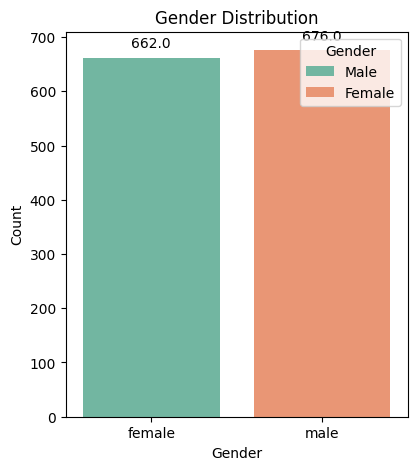

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plots for 'sex', 'smoker', and 'region'
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
sns.countplot(x='sex',  hue='sex', data=insurance_df,  palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding real numbers as text annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add legend for Gender Distribution
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


The above plot indactes that there are almost number of **males 676** and **females 662** in our dataset.

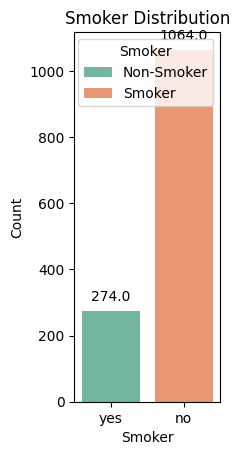

In [84]:
# Smoker Distribution
plt.subplot(1, 3, 2)
ax = sns.countplot(x='smoker', data=insurance_df, palette='Set2')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Adding real numbers as text annotation for Smoker Distribution
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add legend for Smoker Distribution
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

plt.show()


Fetching from the above histogram, Our dataset has the majority of **Non-smokers 1064** and **smokers are 274** .

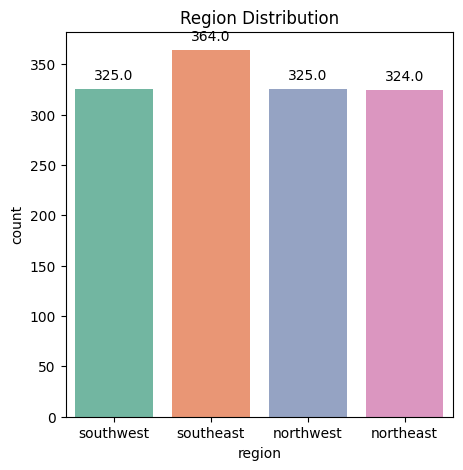

In [85]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='region', hue='region', data=insurance_df, palette='Set2')
plt.title('Region Distribution')

# Adding real numbers as text annotation for Region Distribution
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # Add legend for Region Distribution
# plt.legend(title='Region', labels=['southwest', 'southeast', 'northwest', 'northeast'])

plt.show()


Now we have regions with their number of customers, southwest has 325, south east 364, norhwest 325 and northeast 324. NB: **This comfirms the table implemented early to show the number of people in each region.**

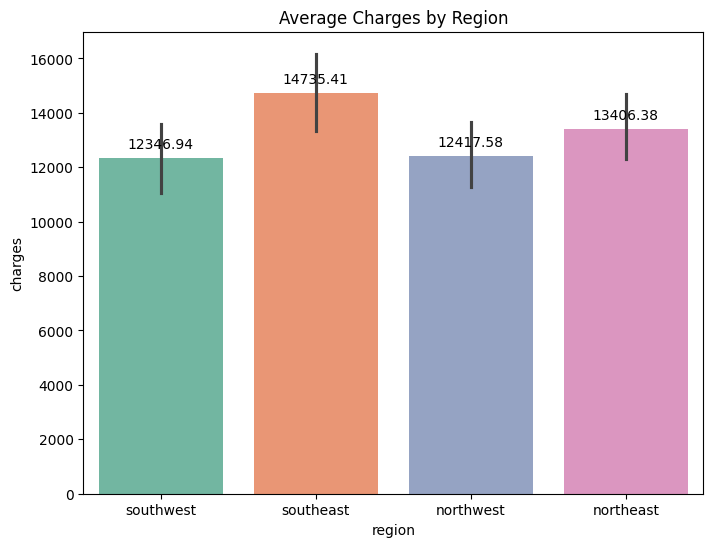

In [86]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='region', y='charges', hue='region', palette='Set2', data=insurance_df)
plt.title('Average Charges by Region')

# Adding real numbers as text annotation for Average Charges by Region
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # Add  legend for Average Charges by Region
# plt.legend(title='Region', labels=['southwest', 'southeast', 'northwest', 'northeast'])

plt.show()


From this above plot, we can infer that the people living **the southeast region has the highest medical charges of 14735.41** compared to the other regions.

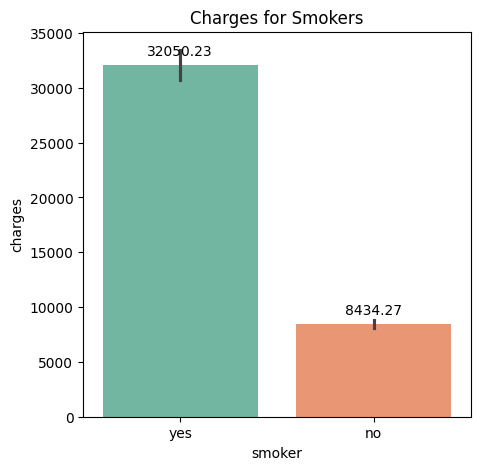

In [87]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='smoker', y='charges', hue='smoker', palette='Set2', data=insurance_df)
plt.title('Charges for Smokers')

# Adding real numbers as text annotation for Charges for Smokers
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # Add manual legend for Charges for Smokers
# plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

plt.show()


As we can see in the above graph, the medical charges of the **smokers are very high to 32050.23** while the medical charges for **non smoker is 8434.7**

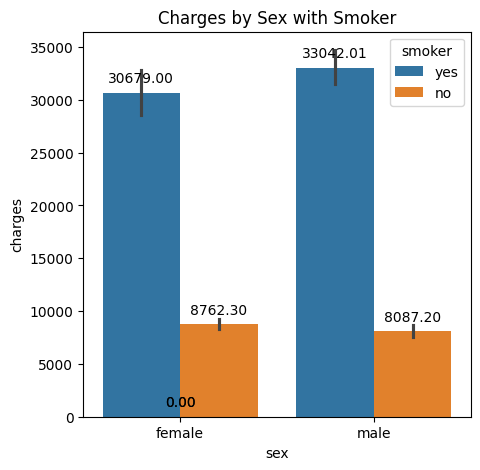

In [88]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='sex', y='charges', hue='smoker', data=insurance_df)
plt.title('Charges by Sex with Smoker')

# Adding real numbers as text annotation for Charges by Sex with Smoker
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # Add manual legend for Charges by Sex with Smoker
# plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

plt.show()




This is to comfirm that male smokers have a **very high medical insurance cost about 33042.01** while **female smokers medical charges is 30679.00**

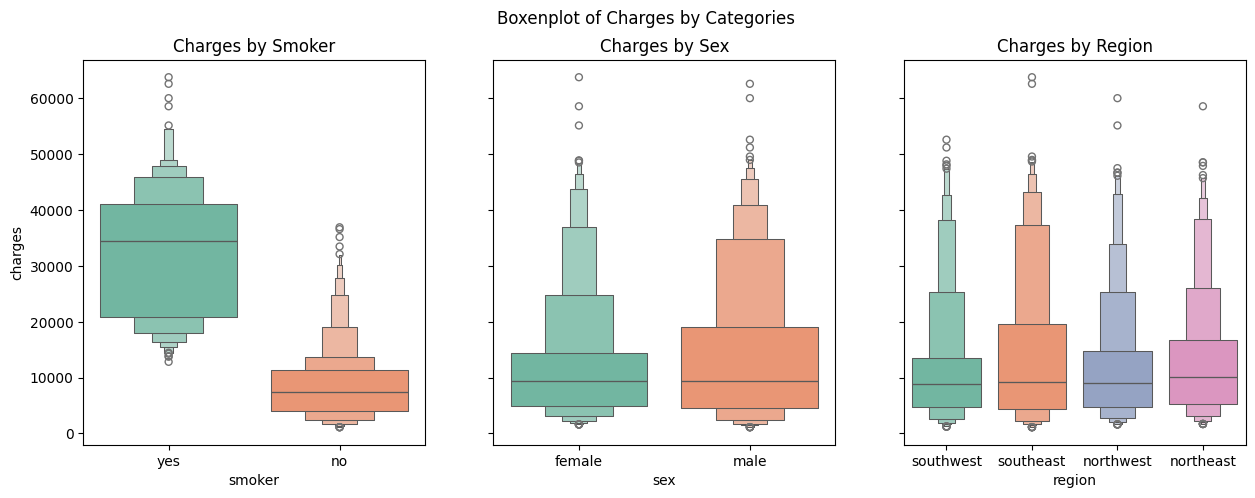

In [89]:
# Create a subplot for boxenplot of charges vs smoker, sex, and region
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxenplot of Charges by Categories')

sns.boxenplot(x='smoker', y='charges', hue='smoker', palette='Set2', data=insurance_df, ax=axes[0])
axes[0].set_title('Charges by Smoker')

sns.boxenplot(x='sex', y='charges', hue='sex', palette='Set2', data=insurance_df, ax=axes[1])
axes[1].set_title('Charges by Sex')

sns.boxenplot(x='region', y='charges', hue='region', palette='Set2', data=insurance_df, ax=axes[2])
axes[2].set_title('Charges by Region')

plt.show()


The above boxplot subplots shows the overview or a summry of our analysis we did in our previous plotting.  

###**Task c: Visualize the relationship among all features using a scatterplot matrix**

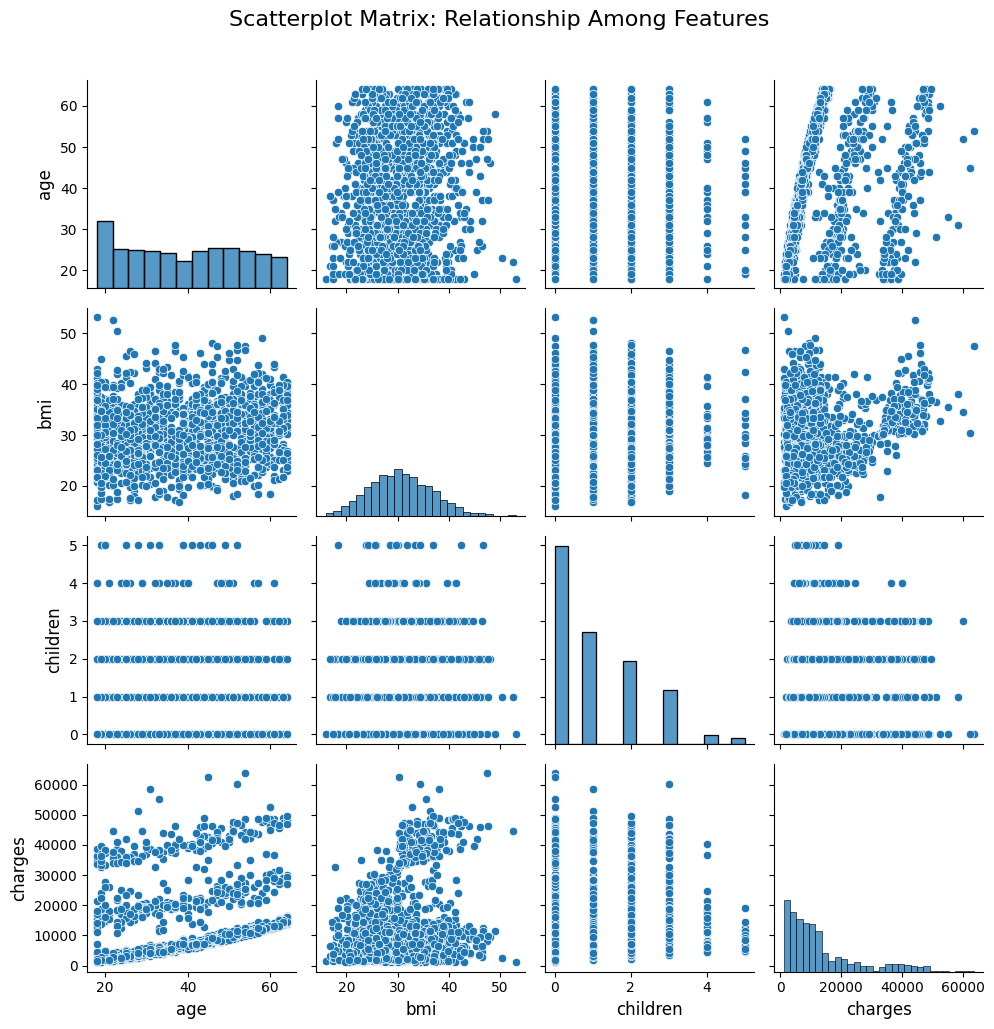

In [90]:
# Task c: Visualize the relationship among all features using a scatterplot matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Create scatterplot matrix
sns.pairplot(insurance_df, palette='Set1', diag_kind='hist')

# Adding labels and title
plt.suptitle('Scatterplot Matrix: Relationship Among Features', y=1.02, fontsize=16)
plt.tight_layout()

# Adjusting position of labels
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

plt.show()



The above scatterplot matrix shows the overview of how all variables are correlated each other. There are histograms that are diagonaly presented and do not show the normal distribution but skewed.
We can easily fetch in the above scatter plot that the variable age and bmi are highly correlated to charges compared to others.

**Lets convert the categorical columns to numerical values and then comfirm variables to use for medical charges prediction by again plotting the heatmap and see how well variables are correlated:**

In [91]:
# Convert categorical columns to numerical values
sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

insurance_df['sex'] = insurance_df['sex'].map(sex_mapping)
insurance_df['smoker'] = insurance_df['smoker'].map(smoker_mapping)
insurance_df['region'] = insurance_df['region'].map(region_mapping)

insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


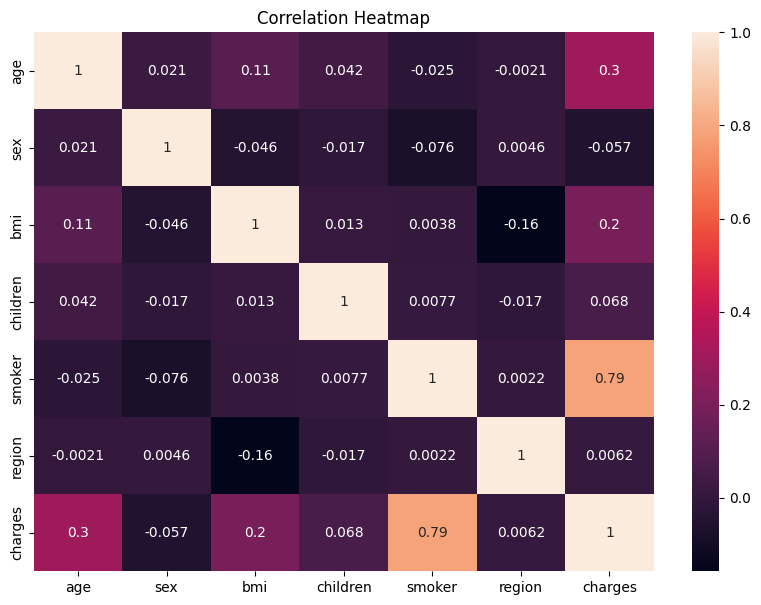

In [92]:
# Heatmap to visualize correlation
plt.figure(figsize=(10, 7))
sns.heatmap(insurance_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

###**Task d: Train a linear regression model on the data.**

In [93]:
# Task d: Train a linear regression model on the data
# Split the data into features and target variable
X = insurance_df.drop(['charges', 'sex'], axis=1)
y = insurance_df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


LinearRegression()

To train a linear regression model on the data, we decided to drop sex as a variable which has the lowest correlation to charges  and also drop the charges it is the one we are targetting.

###**Task e: Evaluate the model performance.**

In [94]:
# Task e: Evaluate the model performance
# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("\nR2 score:", r2)



R2 score: 0.7697211527941855



The R2 score is an indication of how well the model fits the given data. So the higher R2 value indicate a better fit. In our case we have the **R2 score of 76.97%** which is ok.

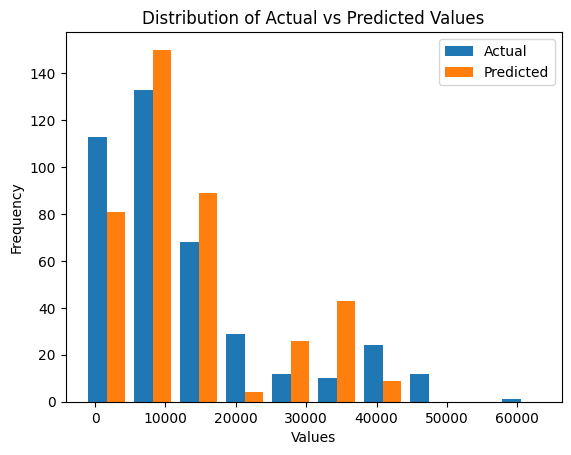

In [95]:
#Distribution of Actual vs Predicted Values
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist([y_test, y_pred], label=['Actual', 'Predicted'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()


In [96]:
## Scenario 1: Non-smoker with BMI below 30
data = {'age':40, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
new_insurance_df = pd.DataFrame(data, index)
#Predicting the medical insurance for the above customers
y_pred = linear_reg.predict(new_insurance_df)
print(f"The medical charges for new customer is:  {y_pred[0]} RWF" )


The medical charges for new customer is:  6964.112373207117 RWF


This is a simple example we tested to show how well a model can predict the charges for a person of 40 years old, with a bmi of 25,  with 2 children and does not smoke and lives in southeast can pay 6964.11 of the amount of money.

###**Task f: Improve the model performance by adding a nonlinear relationship**


In [97]:
# Task f: Improve the model performance by adding a nonlinear relationship

from sklearn.preprocessing import PolynomialFeatures
# Create interaction feature for smoking and obesity
insurance_df['smoker_obese_interaction'] = insurance_df['smoker'] * (insurance_df['bmi'] > 30)

# Generate polynomial features for age
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_age = poly.fit_transform(insurance_df[['age']])

# Combine polynomial features of age with interaction feature and other features
X_combined = np.concatenate((X_poly_age, insurance_df[['smoker', 'smoker_obese_interaction']]), axis=1)

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Train the regression model using combined features
linear_reg_combined = LinearRegression()
linear_reg_combined.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred_combined = linear_reg_combined.predict(X_test_combined)

# Evaluate the model performance
r2_combined = r2_score(y_test, y_pred_combined)
print("Improved R2 score (Combined Features):", r2_combined)

Improved R2 score (Combined Features): 0.8730719002176279


As required in the task, we generated polynomial features for age with the purpose of improving the model. Additionally, we combined age and BMI, resulting in a good model that improved from **76.97% to 87.3%** accuracy.

In [98]:
#Scenario 2: Smoker with BMI above 30
data = {'age':40, 'bmi':35, 'children':2, 'smoker':1, 'region':2}
index = [0]
new_insurance_df = pd.DataFrame(data, index)
#Predicting the medical insurance for the above customers
y_pred = linear_reg.predict(new_insurance_df)
print(f"The medical charges for new customer is:  {y_pred[0]} RWF" )


The medical charges for new customer is:  34037.641860542004 RWF


A test was conducted using the improved model. The BMI was increased to 35 and the individual was categorized as a smoker. The results showed that the insurance premium escalated significantly, amounting to an extremely high value of 34,037.64